In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [28]:
df = pd.read_csv('datasets/CO2.csv', index_col=0)

In [29]:
df.head()

,CO2_ppm
date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.50
1958-06-01,317.10
1958-07-01,315.86


In [30]:
df.describe()

,CO2_ppm
count,727.000000
mean,353.640702
std,27.443136
min,312.660000
25%,328.555000
50%,351.310000
75%,375.700000
max,411.240000


<AxesSubplot:xlabel='date'>

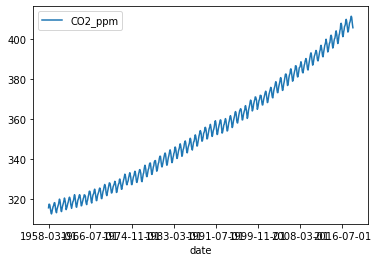

In [31]:
df.plot()

Non Stationary dataset, need to convert into stationary to use arima modelling

In [32]:
changes = df.pct_change()

In [33]:
changes.head()

,CO2_ppm
date,
1958-03-01,NaN
1958-04-01,0.005511
1958-05-01,0.000158
1958-06-01,-0.001260
1958-07-01,-0.003910


In [44]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

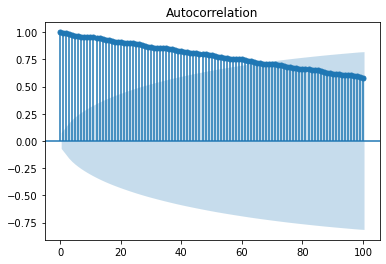

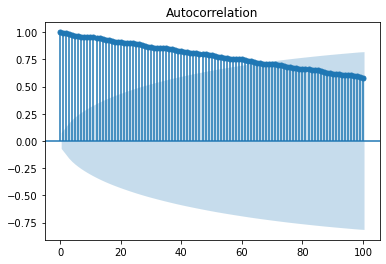

In [35]:
plot_acf(df['CO2_ppm'], lags=100)

In [17]:
from statsmodels.tsa.stattools import adfuller

In [21]:
result = adfuller(df['CO2_ppm'])

In [22]:
# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

4.774866785205469
1.0
{'1%': -3.439646367660705, '5%': -2.8656425177031375, '10%': -2.5689546724554404}


Test Statistic & p-value are very high, not stationary

In [36]:
df = df.diff().dropna()

In [37]:
df.head()

,CO2_ppm
date,
1958-04-01,1.74
1958-05-01,0.05
1958-06-01,-0.40
1958-07-01,-1.24
1958-08-01,-0.93


In [40]:
result2 = adfuller(df['CO2_ppm'])

In [41]:
# Print test statistic
print(result2[0])

# Print p-value
print(result2[1])

# Print critical values
print(result2[4])

-5.287425631615295
5.813789175331615e-06
{'1%': -3.4396596024765795, '5%': -2.86564834926679, '10%': -2.568957779286756}


p-value now extremely low and time series is stationary

<AxesSubplot:xlabel='date'>

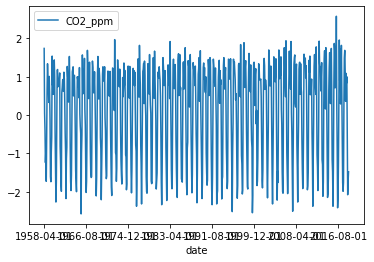

In [42]:
df.plot()

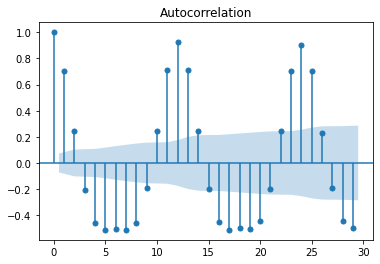

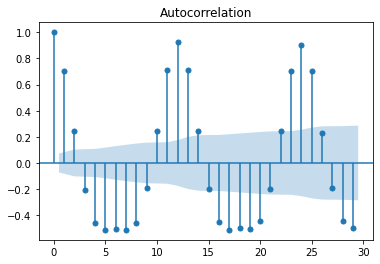

In [43]:
plot_acf(df['CO2_ppm'])

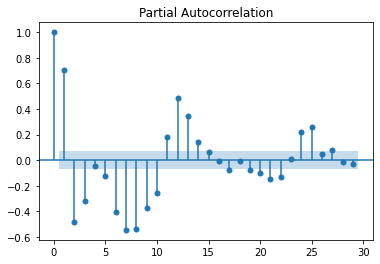

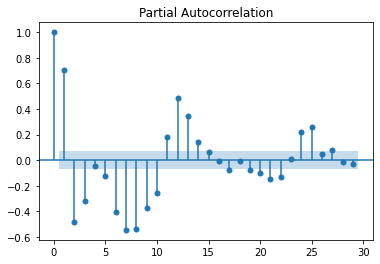

In [45]:
plot_pacf(df['CO2_ppm'])

In [46]:
import pmdarima as pmd

ModuleNotFoundError: No module named 'pmdarima'